# Prediction of Ms (Martensite Start) temperatures in Martensitic stainless steels

The Problem of estimating Martensite-Start temperatures and to do be able to predict accurately for any composition is a difficult problem in steel science. Martensitic transformation is a phase change that occurs when rapidly cooling a steel from its high temperature phase (austenite) to ambient. During cooling, the steel will transform in part to its low temperature phase, called martensite. Martensite transformation does not occur as usual phase transformation, it requires a relatively fast cooling, and occurs with local, tiny, but however rapidly propagating atom movement. This mode of transformation occurs a a definite temperature, and will stop rapidly if cooling is stopped: this mode of transformation is called *athermal* and is typical of martensitic transformation. Although, to slightly complicate everything, steels will often continue transforming when colling is stopped, but under a different mode, called *thermally activated martensitic transformation*. Martensitic transformation is possible because the energy surplus dissipated during cooling is high enough to allow for a martensite nucleus, called a *stacking fault* to propagate and form small, but however microscopically visible crystals, called *laths*. The small size of laths, the fact that the transformation is fast enough to trap carbon surplus within the grains, and the high quantity of linear defects, or *dislocation* all conspire to produce a very strong, although fragile material, this is the secret of how hardened steel becomes really, really strong.

Of course, as you can imagine, it's very difficult to make a prediction of Ms temperatures, and Ms values depends strongly on the composition, and microstructure. However, many formulae have been derived using usually linear regression, but none is really satisfying for every steel. Physical models have also been developped and give rather satisfactorily results, and are often preferred by researchers, but rather unknown by practionners because they require complicated calculations and a good database of thermodynamic parameters. It seems thus rather interesting to develop a machine learning algorithm that will allow for using non-linear models, and does not require thermodynamic databases to assess.

It will be demonstrated here how easy it is to train such a model, and how to fine-tune parameters to achieve high accuracy and make prediction comparable to physical models.

## 1. Import data and format for MLPRegressor

As the database has already been cleaned and checked (See Sourmail et al, 1994), it is sufficient to load it from xlsx Excel Markup format using python library *Pandas*, and its function **pd.read_excel**. The resulting DataFrame is then cleaned from **Ref** that contains references where the data has been extracted and the **Ms(k)** column that contains the Martensite start temperatures that the model should learn.

In [1]:
import pandas as pd
# load training set
ms_data_complete = pd.read_excel("Ms_database_28_05_2004.xlsx", sheetname="All_data_verified", header=0)
ms_data_complete.head(10)

,C,Mn,Si,Cr,Ni,Mo,V,Co,Al,W,Cu,Nb,Ti,B,N,Ms(k),Ref
0,0.25,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,685.0,BT-9
1,0.30,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,666.0,BT-10
2,0.38,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,631.0,BT-11
3,0.40,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,629.0,BT-12
4,0.44,0.81,0.28,0.14,0.15,0.04,0.0,0.0,0.0,0.0,0.12,0.0,0.0,0.0,0.0,591.0,BT-13
5,0.51,0.30,0.75,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,618.0,BT-14
6,0.52,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,516.0,BT-15
7,0.56,0.30,0.75,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,593.0,BT-16
8,0.60,0.72,0.20,0.17,0.20,0.03,0.0,0.0,0.0,0.0,0.12,0.0,0.0,0.0,0.0,543.0,BT-17
9,0.61,0.30,0.75,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,578.0,BT-18


In [2]:
# make Ms(k) column our output column and drop it, with ref from the DataFrame
y = ms_data_complete["Ms(k)"]
X = ms_data_complete.drop(["Ms(k)","Ref"], axis=1)

## 2. A first trial

No more preparation will be required to train a model. As the parameters are yet unknown, the default ones will be used. But before that the dataset needs to be split into a training set and a test set.

The training set will be used to train the MLPRegressor model and the test set is used to calculate the score (here, the calculated score is the **autocorrelation** score set by default with the model choice).

Although the MLPRegressor model parameters are chosen at random for this run, the choice has been made to use an approximate Hessian method, called L-BFGS that's usually good when the error function surface has ridges (it looks like a stretched ellipse). It is expected to be like that here because the input vectors are concentration that may differ a lot with regard to their influence on the Martensite start temperature. Using mini-batch or SGD here is not necessary since the size of the training set is reasonably small.

Finally, the activation function of hidden units has been chosen to be a **tanh**, hyperbolic tangent function.

In [3]:
from sklearn.model_selection import train_test_split

# split the dataset between train and test set. The training set is extracted at random
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.neural_network import MLPRegressor
reg_ms = MLPRegressor(hidden_layer_sizes=(100,), solver='lbfgs', activation='tanh')
reg_ms.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [5]:
reg_ms.score(X_test, y_test)

0.79091811845750537

In [35]:
reg_ms2 = MLPRegressor(hidden_layer_sizes=(500, 1500,), alpha=0.001, solver='lbfgs', activation='tanh')
reg_ms2.fit(X_train, y_train)
reg_ms2.score(X_test, y_test)

0.93530717919674311

## 3. Beyond the test score

Although the test score value was pretty disappointing, it is worth exploring where the first model did wrong. This will be done by plotting the predictions versus the observations using python plotting API, **matplotlib**.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

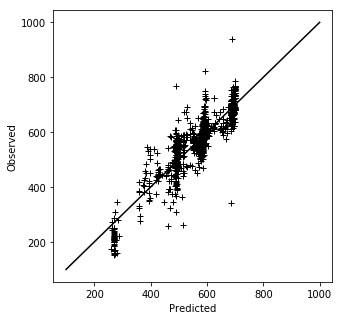

In [10]:
plt.figure(figsize=(5,5))
plt.plot(reg_ms.predict(X), y, '+', c='k')
plt.plot(np.array([100, 1000]), np.array([100, 1000]), '-k', lw=1.5)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

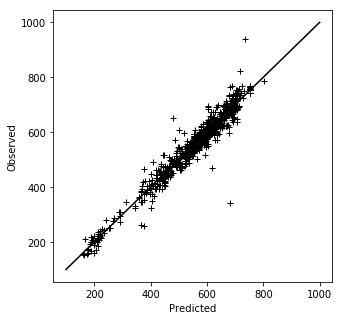

In [32]:
plt.figure(figsize=(5,5))
plt.plot(reg_ms2.predict(X), y, '+', c='k')
plt.plot(np.array([100, 1000]), np.array([100, 1000]), '-k', lw=1.5)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

Most of the points are situated along the bisecting line, that's exactly what measures the autocorrelation coefficient, used as a test score here. However, the data seems clustered, forming stripes, especially for higher temperatures, for the lowest temperatures that interest us the most, the dispersion is rather high. It is probably possible to (much?) better.

## 4. Model parameter optimization using grid search

The reason why our first trial performed so bad was likely a poor choice of parmeter models. For neural networks, the most obvious choice of model parameter to optimize are the size of hidden layer and **$\alpha$**, the regularization parameter. Both will thus be varied and the score will be calculated to help select the best parameter set.

Grid search, also known as *brute force optimization* is a way to systematically assess models on a grid of parameters. Due to the grid nature of the problem, the number of models train increases roughly with the "mean" number of tested parameters as the power of the dimension of the parameter space. A the parameter space dimension is 2 here, with 9 values for the hidden layer size and 5 for the learning, not less than 9*5 = 45 models need to be trained.

Another subtlety is that GridSearchCV, the sci-kit learn object that abstracts the grid search algorithm, uses cross-validation to get the training score. A 10-fold cross validation will be used here. Cross-validation means that the training is repeated n times, where n is the number of folds, each time with (n-1)/n of the training data and the training score is evaluated on the 1/n left out. Training is repeated with a different training set, so that the model will see all training data after a complete cross-validation cycle. Using a 10-fold thus means that the model will be trained 10 times:
- the first time with the first 9/10 of the data and the score will be evaluated on the last 1/10 of training data
- the second time with the first 8/10 + the last 1/10 and the score will be evaluated on the one before last 1/10 training data,
- and so on, 10 times.

Finally, the global training score will be evaluated with the test set left out, on data that the model has thus never seen before.

In [8]:
from sklearn.model_selection import GridSearchCV

hl_sizes = [(15,), (50,), (100,), (200,), (500,), (1000,), (1500,), (2000,), (3000,)]
param_grid = {'alpha': [1e-2, 1, 100, 500, 1000], 'hidden_layer_sizes': hl_sizes}
# Grid search for best parameters
grid_search = GridSearchCV(MLPRegressor(solver='lbfgs', activation='tanh'), param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 100, 500, 1000], 'hidden_layer_sizes': [(15,), (50,), (100,), (200,), (500,), (1000,), (1500,), (2000,), (3000,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

It takes some time to train all the 45 models, but hopefully some combination parameters will have increased the score.

GridSearchCV helps display the score (here, as the model didn't change, it'll still be the regression coefficient), and keeps it for each trained model, but the most interesting is of course the best score. This is stored under the attribute `GridSearchCV.best_score_`,  and the corresponding parameters are stored under the attribute `GridSearchCV.best_params_`. However, the score value must be generalized on data that the trained model didn't see already (as explained above). This is called, not surprisingly, the *generalization score*.

The generalization score can be obtained using the test set that has been set apart earlier. It is sufficient to use our model `score(X_test, y_test)` method to have a pretty good idea of how the model generalizes.

In [9]:
print("Best (validated) scores:", grid_search.best_score_)
print("Best (non generalized) parameters",grid_search.best_params_)
print("Generalization score:", grid_search.score(X_test, y_test))

('Best (validated) scores:', 0.90285032294488154)
('Best (non generalized) parameters', {'alpha': 100, 'hidden_layer_sizes': (1500,)})
('Generalization score:', 0.93914574785009086)


In [10]:
grid_search.best_estimator_

MLPRegressor(activation='tanh', alpha=100, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

The results are dramatically better, and it seems that the first choice was not even close to be the best.

To understand further how parameters influence the regression quality, it would be useful to visualize all the results at once. It can be done using seaborn, and matplotlib. The relevant function in that case is `seaborn.heatmap()`, showing the scores using a colormap that uses more "intense" tones for higher values, hence the name, **heat**map, you got the idea. Here I used the `'viridis'` colormap, because it is best suited to getting correct impressions of differences in intensity, since it tends to create a linear mapping with our retina sensitivity. But on another note, it is also because *Hildegard von Bingen* is one of my alltime heroes. 

In [11]:
mean_scores = grid_search.cv_results_['mean_test_score'].reshape(5,9)
mean_scores

array([[ 0.37487511,  0.6625802 ,  0.78308405,  0.85520756,  0.8918238 ,
         0.89122646,  0.88656856,  0.89494904,  0.89609742],
       [ 0.52077177,  0.68799426,  0.79724395,  0.85347823,  0.87559047,
         0.88706882,  0.89398326,  0.89591103,  0.89202279],
       [ 0.65126563,  0.80387969,  0.84357084,  0.87851555,  0.89439896,
         0.90185496,  0.90285032,  0.8971687 ,  0.89904739],
       [ 0.58055322,  0.81127507,  0.86324861,  0.85830692,  0.88165479,
         0.89843695,  0.90264697,  0.90006507,  0.89950654],
       [ 0.4179924 ,  0.71937677,  0.80172298,  0.81756763,  0.87830649,
         0.88544615,  0.88675646,  0.88735362,  0.8819271 ]])

In [12]:
import seaborn as sns

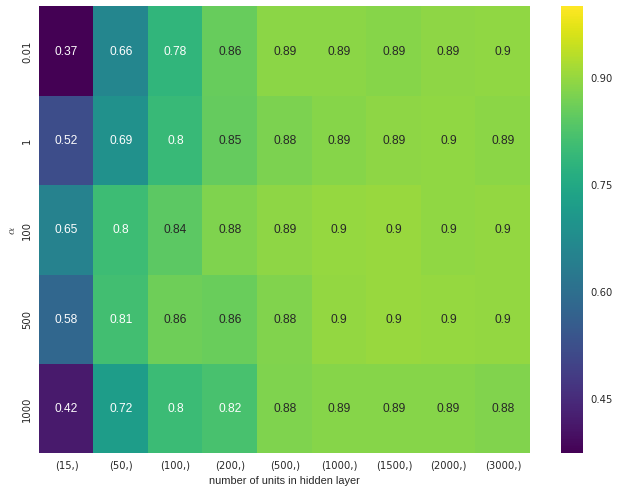

In [13]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)
xlab = 'number of units in hidden layer'
ylab = r'$\alpha$'
xticks = param_grid['hidden_layer_sizes']
yticks = param_grid['alpha']
sns.heatmap(mean_scores, xticklabels=xticks, yticklabels=yticks, annot=True, vmax=1, cmap='viridis')
ax1.set_xlabel(xlab)
ax1.set_ylabel(ylab)
plt.show()

The model appears to be sensitive to both the learning rate and the number of hidden units. The best values seem to cluster around $\alpha = 100\!-\! 500$ and a few thousands of units in the hidden layer.

The number of hidden layers handle the complexity of the model, and likely how solutes interact, conspire to yield a given Martensite start temperature. Such a complexity can be explained by the fact composition affect microstructure in various ways, not all related to how austenite transforms to martensite, making Ms prediction a complex task under completely *a priori* assumptions, however, it appears that ANN regression does really well, compared to linear regression.

The learning rate influence can be understood because the values used have not been scaled prior to training, and elements composition's influence strength is contrasted due to their different solubilities in austenite and/or ferrite. For instance, it is well known that carbon have a very strong influence on Ms, increasing it even with rather low increments, when chromium is pretty neutral.

It's now time to see how the observed score increase impact on prediction. To see that, it'll be useful to plot predicted results against measured values.

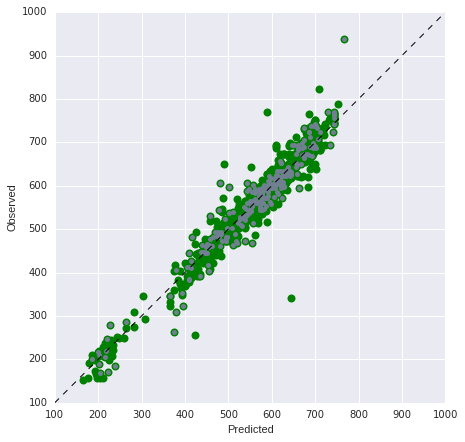

In [14]:
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(111)

ax2.plot(grid_search.predict(X), y, marker='o', markersize=8, markerfacecolor='g', linestyle='None')
ax2.plot(grid_search.predict(X_test), y_test, marker='o', markersize=5, markerfacecolor='slategrey', linestyle='None')
ax2.plot(np.array([100, 1000]), np.array([100, 1000]), '--k', lw=1)
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Observed")
plt.show()

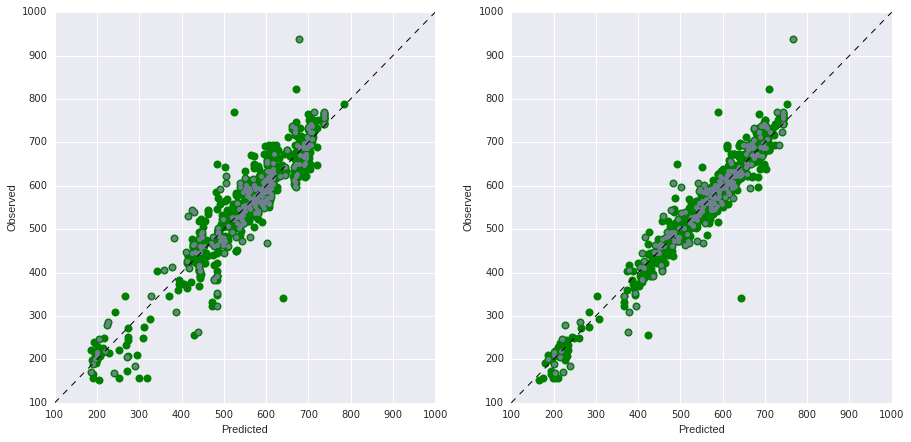

In [15]:
fig3 = plt.figure(figsize=(15,7))

ax3 = fig3.add_subplot(121)
ax3.plot(reg_ms.predict(X),  y, marker='o', markersize=8, markerfacecolor='g', linestyle='None')
ax3.plot(reg_ms.predict(X_test), y_test, marker='o', markersize=5, markerfacecolor='slategrey', linestyle='None')
ax3.plot(np.array([100, 1000]), np.array([100, 1000]), '--k', lw=1)
ax3.set_xlabel("Predicted")
ax3.set_ylabel("Observed")

ax4 = fig3.add_subplot(122)
ax4.plot(grid_search.predict(X), y, marker='o', markersize=8, markerfacecolor='g', linestyle='None')
ax4.plot(grid_search.predict(X_test), y_test, marker='o', markersize=5, markerfacecolor='slategrey', linestyle='None')
ax4.plot(np.array([100, 1000]), np.array([100, 1000]), '--k', lw=1)
ax4.set_xlabel("Predicted")
ax4.set_ylabel("Observed")
plt.show()

When comparing to earlier results, it is visible that the points have drifted towards the bisecting line. That's exactly what is expected, since tuning parameters was primarily aimed at reducing prediction error. However, it seems that some points didn't move at all. For those, database error may have occur, maybe some values have been taken as Celsius instead of Kelvin, or the other way around. The worst predictions seems to occur with a 250 to 300 K difference.

## 5. Prediction on "reformed austenite" after tempering two martensitic stainless steels

Now, it's time for the ultimate test! We'll use Thermo-Calc data of three austenite composition to predict Ms in those steels. It's expected that Ms will be in the lower range, but one should be much more stable than the two others.

In [16]:
X.columns.values

array([u'C', u'Mn', u'Si', u'Cr', u'Ni', u'Mo', u'V', u'Co', u'Al', u'W',
       u'Cu', u'Nb', u'Ti', u'B', u'N'], dtype=object)

### 5.1 410 NiMo

410 NiMo is the first one of the two steels, and it has been tempered for 1hr at 570°C, to produce 9% of reverted austenite. Since it has been observed to transform back to martensite, it is expected that its Ms will be sub-ambient.

In [24]:
"""FE  7.58547E-01  MN  1.21780E-02  CU  1.47118E-03
   CR  1.14263E-01  SI  4.91552E-03  N   2.84476E-05
   NI  1.03678E-01  MO  4.91287E-03  C   6.63414E-06"""


x410 = {'MN': 1.21780E-02, 'CU': 1.47118E-03, 'CR': 1.14263E-01, 'SI': 4.91552E-03, 'N': 2.84476E-05, 'NI': 1.03678E-01, 
        'MO': 4.91287E-03, 'C': 6.63414E-06}
wt_pc_410 = { elt:  wt_fr * 100 for elt, wt_fr in x410.items() }
model_format = X.columns.values
test_410 = np.array([wt_pc_410[elt.upper()] if elt.upper() in wt_pc_410.keys() else 0.0 for elt in model_format])
# ms_410 = grid_search.predict(test_410.reshape(1, -1))
ms_410 = reg_ms2.predict(test_410.reshape(1, -1))
ms_410 - 273.15

array([ 199.89823725])

In [34]:
def format_for_prediction(c_vals, model_format):
    """ format mass fraction vector from T-C into a vector suitable for prediction by NN 
        precondition: mass fractions arranged in a dictionary """
    wt_pc = { elt.upper():  wt_fr * 100 for elt, wt_fr in c_vals.items() }
    test = np.array([wt_pc[elt.upper()] if elt.upper() in wt_pc.keys() else 0.0 for elt in model_format])
    return test.reshape(1, -1)

#ms_410 = grid_search.predict(format_for_prediction(x410, X.columns.values))
ms_410 = reg_ms2.predict(format_for_prediction(x410, X.columns.values))
ms_410 - 273.15

array([ 261.0532819])

### 5.2 HY 078

HY078 contains slightly more nickel and manganese than austenite, and the quantity of reverted austenite has been varied by tempering at different temperatures. The higher the temperature, the higher quantity but it is also much less stable, with a lot of fresh martensite forming during quenching.

In [33]:
""" 843K:  FE  6.88994E-01  MN  4.35240E-02  MO  3.10071E-04
    NI  1.46873E-01  SI  7.97275E-03  N   9.88159E-06
    CR  1.12003E-01  CU  3.11112E-04  C   3.00873E-06 """
""" 903K: FE  7.55758E-01  MN  2.32460E-02  CU  1.59987E-04
    CR  1.21803E-01  SI  7.48523E-03  N   3.97542E-05
    NI  9.11434E-02  MO  3.48143E-04  C   1.67374E-05"""

xh078_lt = {'MN': 4.35240E-02, 'MO': 3.10071E-04, 'NI': 1.46873E-01, 'SI': 7.97275E-03, 'N': 9.88159E-06, 
            'CR': 1.12003E-01, 'CU': 3.11112E-04, 'C': 3.00873E-06}
xh078_ht = {'MN': 2.32460E-02, 'CU': 1.59987E-04, 'CR': 1.21803E-01, 'SI': 7.48523E-03, 'N': 3.97542E-05, 
            'NI': 9.11434E-02, 'MO': 3.48143E-04,  'C': 1.67374E-05}

#ms_h078_lt = grid_search.predict(format_for_prediction(xh078_lt, X.columns.values))
#ms_h078_ht = grid_search.predict(format_for_prediction(xh078_ht, X.columns.values))

ms_h078_lt = reg_ms2.predict(format_for_prediction(xh078_lt, X.columns.values))
ms_h078_ht = reg_ms2.predict(format_for_prediction(xh078_ht, X.columns.values))


print("Predicted Ms for HY078 Tempered at 843K:", ms_h078_lt - 273.15)
print("Predicted Ms for HY078 Tempered at 903K:", ms_h078_ht - 273.15)

('Predicted Ms for HY078 Tempered at 843K:', array([ 71.46888848]))
('Predicted Ms for HY078 Tempered at 903K:', array([ 192.14851825]))
